In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets


## Quick look at the Data Structure

In [3]:
df = pd.read_csv('noshowappointments/KaggleV2-May-2016.csv')

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:

print(f'Dataset has {df.shape[0]} rows and {df.shape[1]} columns')

print(f'We see that one person has more then one appoitment, bacause we have {df.shape[0]} appointments and only {len(df.PatientId.unique())} persons')

len(df.AppointmentID.unique())
print('Appitment ID is unique. For every apoitnment we have new number. We can use this number in index')

Dataset has 110527 rows and 14 columns
We see that one person has more then one appoitment, bacause we have 110527 appointments and only 62299 persons
Appitment ID is unique. For every apoitnment we have new number. We can use this number in index


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Age column
- min is -1 what means that here we have some mistake
- max value is 115. We can drop all values which are more then 100


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#we don't have null entries 

PatientID should be int64
Gender should be int64
ScheduledDay & AppointmentDay should be datetime
'No-show','Neighbourhood','Gender' are a string

## Create a test set
before we start to discover and visualize the data

In [8]:
target = df['No-show']
df1 = df.drop('No-show',axis=1)


In [9]:
#if 'No-show' in df1:
#    print(True)
#else:
#    print(False)
    
np.isin('No-show',df1.columns)

array(False)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(df1,target,test_size=0.33,random_state=42)

In [15]:
print(f'Train set with attributes has {X_train.shape[0]} rows and Test set has {X_test.shape[0]} rows')

Train set with attributes has 74053 rows and Test set has 36474 rows


### target set balance

In [32]:
percent_YES_train = y_train.value_counts()[1]/y_train.value_counts().sum()
percent_YES_test = y_test.value_counts()[1]/y_test.value_counts().sum()
print('Our train und test target sets are balanced. We have ca. 20% YES and 80% NO in both sets')

Our train und test target sets are balanced. We have ca. 20% YES and 80% NO in both sets


### gander balanced sets

In [52]:
X_train.Gender.value_counts()
percent_Woman_train = round(X_train.Gender.value_counts()[0]/X_train.Gender.value_counts().sum()*100)
percent_Woman_test = round(X_test.Gender.value_counts()[0]/X_test.Gender.value_counts().sum()*100)

print('Our train and test sets with attributes are also balanced. We have 65% woman in both of them')

Our train and test sets with attributes are also balanced. We have 65% woman in both of them


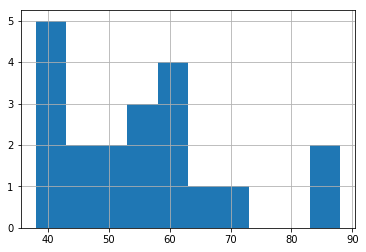

In [44]:
df.PatientId.value_counts().head(20).hist()

In [48]:
df.PatientId.value_counts().head(20)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
2.584244e+11    62
7.579746e+13    62
8.713749e+14    62
6.264199e+12    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
8.189452e+13    42
9.452745e+12    42
1.882323e+14    40
9.496197e+12    38
2.271580e+12    38
Name: PatientId, dtype: int64

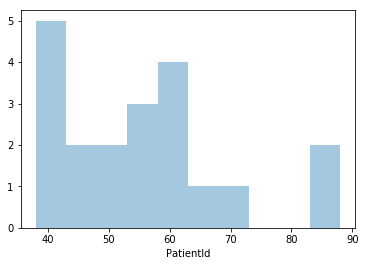

In [50]:
sns.distplot(df.PatientId.value_counts().head(20),kde=False,bins=10)

It is a supervised problem because we have data with labels